In [1]:
# Standard libraries
import numpy as np
import json
from datetime import datetime

# Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider

# Own library
from quantum_gates.simulators import MrAndersonSimulator
from quantum_gates.gates import standard_gates
from quantum_gates.circuits import EfficientCircuit
from quantum_gates.utilities import DeviceParameters
from quantum_gates.utilities import setup_backend

IBM_TOKEN = "Your Token"

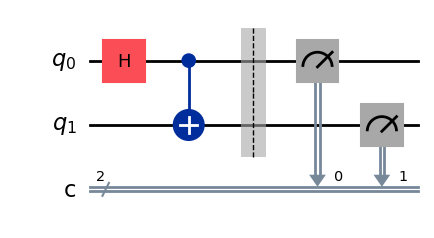

In [2]:
circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)
circ.barrier(range(2))
circ.measure(range(2),range(2))
circ.draw('mpl')

In [3]:
config = {
    "backend": {
        "hub": "ibm-q",
        "group": "open",
        "project": "main",
        "device_name": "ibmq_manila"
    },
    "run": {
        "shots": 1000,
        "qubits_layout": [0, 1],
        "psi0": [1, 0, 0, 0]
    }
}

In [4]:
#backend_config = config["backend"]
#backend = setup_backend(Token=IBM_TOKEN, **backend_config)


provider = IBMProvider(token=IBM_TOKEN)
backend = provider.get_backend('ibm_brisbane')



prop = backend.properties()



In [5]:
run_config = config["run"]
qubits_layout = run_config["qubits_layout"]
print(qubits_layout)

[0, 1]


In [6]:
prop.gate_length('ecr', [qubits_layout[1], qubits_layout[0]])

6.6e-07

In [ ]:

device_param = DeviceParameters(qubits_layout)

device_param.load_from_backend(backend)
device_param_lookup = device_param.__dict__()


In [7]:
sim = MrAndersonSimulator(gates=standard_gates, CircuitClass=EfficientCircuit)

t_circ = transpile(
    circ,
    backend,
    scheduling_method='asap',
    initial_layout=qubits_layout,
    seed_transpiler=42
)

#t_circ.draw(output='mpl')

In [15]:
q = t_circ.data[1][1][0]._index
q = qubits_layout.index(q)

print(q)

0


In [8]:

probs = sim.run(
    t_qiskit_circ=t_circ, 
    qubits_layout=qubits_layout, 
    psi0=np.array(run_config["psi0"]), 
    shots=run_config["shots"], 
    device_param=device_param_lookup,
    nqubit=2)

counts_ng = {format(i, 'b').zfill(2): probs[i] for i in range(0, 4)}

We only support a linear connectivity at the moment.


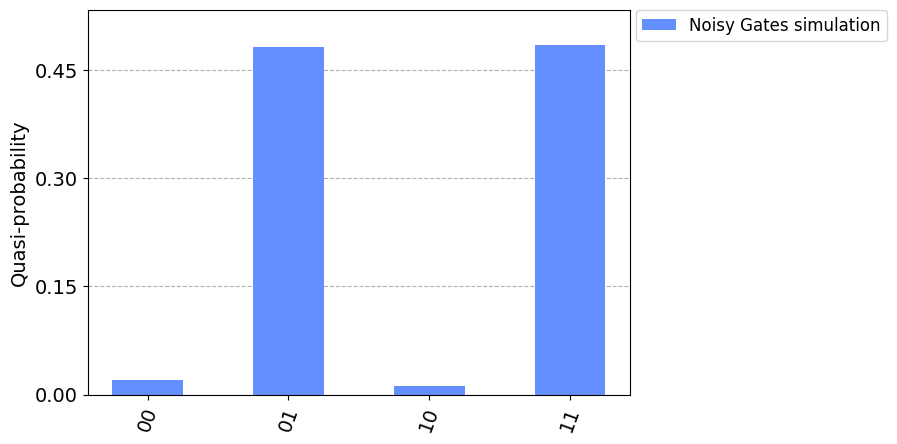

In [9]:
plot_histogram(counts_ng, bar_labels=False, legend=['Noisy Gates simulation'])